In [13]:
import pandas as pd

weather = pd.read_csv("data/CURATED/WEATHER.csv", parse_dates=["TIME"], index_col="TIME")
weather.head()

,Temperature,Wind_Speed
TIME,,
2018-01-01 00:00:00,4.0,11.0
2018-01-01 01:00:00,8.0,13.0
2018-01-01 02:00:00,8.0,14.0
2018-01-01 03:00:00,9.0,13.0
2018-01-01 04:00:00,9.0,16.0


In [14]:
import pandas as pd

# fuel = pd.read_csv("data/fuel_prices.csv", parse_dates=["TIME"], index_col='TIME')
price = pd.read_csv("data/CURATED/ENERGY_SETTLEMENT_PRICE.csv", parse_dates=["TIME"], index_col='TIME')
# demand = pd.read_csv("data/energy_demand.csv", parse_dates=["TIME"], index_col='TIME')
# weather = pd.read_csv("data/WEATHER_TEST.csv", parse_dates=["TIME"], index_col='TIME')

In [15]:
p = price.resample("D").mean()["VALUE"]
p.name = "Cena Energii"
# d = demand.resample("D").mean()["VALUE"]
# d.name = "Zapotrzebowanie na energię"
# f = fuel.resample("D").mean()["FUEL_PRICE"]
# f.name = "Cena paliwa"
t = weather.resample("D").mean()["Temperature"]
t.name = "Temperatura"
ws = weather.resample("D").mean()["Wind_Speed"]
ws.name = "Szybkość wiatru"

it = [p, t, ws]

In [16]:
from functools import reduce

idx = reduce(lambda x, y: x.intersection(y), map(lambda x: x.index, it))
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25',
               '2021-09-26', '2021-09-27'],
              dtype='datetime64[ns]', name='TIME', length=1366, freq='D')

In [17]:
series = map(lambda x: x.loc[idx].sort_index(), it)
corr = pd.concat(series, axis=1).corr()

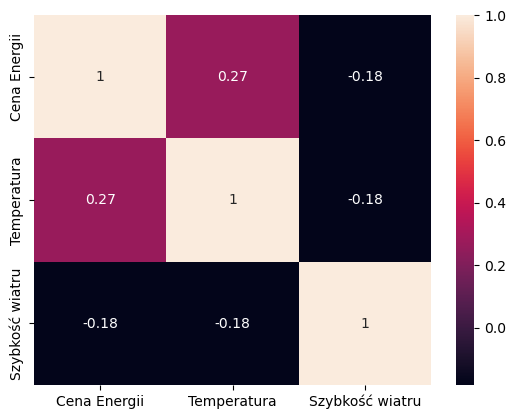

In [18]:
import seaborn as sns
sns.heatmap(corr, annot=True);